# Transshipment Problem

Transshipment problems are network problems, the primary topic for this week. This example may help you prepare for working on larger transshipment problems. 

The Bavarian Motor Company (BMC) manufactures expensive luxury cars in Hamburg, Germany, and exports cars to sell in the United States. The exported cars are shipped from Hamburg to ports in Newark, New Jersey and Jacksonville, Florida. From these ports, the cars are transported by rail or truck to distributors located in Boston, Massachusetts; Columbus, Ohio; Atlanta, Georgia; Richmond, Virginia; and Mobile, Alabama. The below figure shows the possible shipping routes available to the company along with the transportation cost for shipping each car along the indicated path. Currently, 200 cars are available at the port in Newark and 300 are available in Jacksonville. The numbers of cars needed by the distributors in Boston, Columbus, Atlanta, Richmond, and Mobile are 100, 60, 170, 80, and 70, respectively. BMC wants to determine the least costly way of transporting cars from the ports in Newark and Jacksonville to the cities where they are needed.  Formulate the LP and solve it using software of your choice. Conduct sensitivity analysis by varying the cost of shipping across selected links. Interpret the results.

Describe how you would go about solving a larger transshipment problem such as an actual vehicle distribution problem across the domestic United States. Imagine a company with multiple seaports of entry and more than 300 distributors to cover all cities with a population of at least 100 thousand residents.  What software would you use? How would you manage the data? What would be your approach to employing sensitivity analysis in a problem of this scale?   (To guide your thinking about this problem, you could start with a list of cities and their locations by latitude and longitude as shown in  https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population.  (Links to an external site.) Imagine that transportation cost is proportional to the distance between each pair of cities and demand, cars needed, is proportional to population.) 

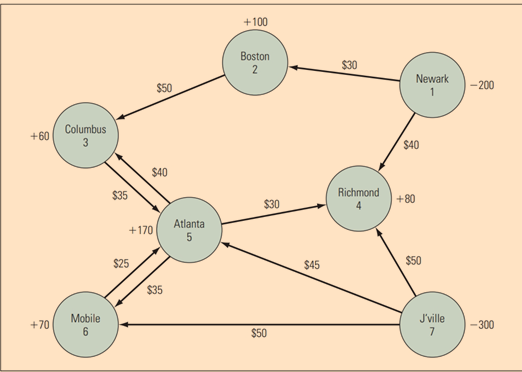

In [14]:
# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK
# Note, you may need to conda install or pip install GLPK

# Sensitivity Analysis File and Model (lp) file will output
# to your working directory.

# Problem (Wine Problem)
# define variables
X12 = LpVariable("X12", 0, None)
X14 = LpVariable("X14", 0, None)
X23 = LpVariable("X23", 0, None)
X35 = LpVariable("X35", 0, None)
X53 = LpVariable("X53", 0, None)
X54 = LpVariable("X54", 0, None)
X56 = LpVariable("X56", 0, None)
X65 = LpVariable("X65", 0, None)
X74 = LpVariable("X74", 0, None)
X75 = LpVariable("X75", 0, None)
X76 = LpVariable("X76", 0, None)

# defines the problem
prob_cars= LpProblem("problem", LpMinimize)
# Note, LpMaximize for a maximization problem, 
# and LpMinimize for a minimization problem

# define constraints
#supply constraints
prob_cars+= X12 + X14 <= 200 #Newark
prob_cars+= X74 + X75 + X76 <= 300 #Jacksonville

#demand constraints
prob_cars+= X12-X23 == 100 #Boston
prob_cars+= X23+X53-X35 == 60 #Columbus
prob_cars+= X75+X35+X65-X54-X56-X53 == 170 #ATL
prob_cars+= X14+X54+X74 == 80 #Richmond
prob_cars+= X76+X56-X65 == 70 #Mobile

prob_cars+= X12 + X14 + X23 + X35 + X53 + X54 + X56 + X65 + X74 + X75 + X76 >=0


# Note, if <= then <=
# If >= then >=
# If = then ==

# define objective function
prob_cars+= 30*X12 + 40*X14 + 50*X23 + 35*X35 + 40*X53 + 30*X54 + 35*X56 + 25*X65 + 50*X74 + 45*X75 + 50*X76

# solve the problem
prob_cars.writeLP("prob_cars.lp")
prob_cars.solve(GLPK(options=['--ranges prob_cars.sen']))
print ("Status:", LpStatus[prob_cars.status])

# Note, we are only able to get sensitivity information because we are solving
# as a linear program.  If we solved as an Integer Program, then no 
# sensitivity information would be available.

for v in prob_cars.variables():
    print(v.name, "=", v.varValue, " shipments")

print ("Objective", value(prob_cars.objective))
print ("")


Status: Optimal
X12 = 120.0  shipments
X14 = 80.0  shipments
X23 = 20.0  shipments
X35 = 0.0  shipments
X53 = 40.0  shipments
X54 = 0.0  shipments
X56 = 0.0  shipments
X65 = 0.0  shipments
X74 = 0.0  shipments
X75 = 210.0  shipments
X76 = 70.0  shipments
Objective 22350.0

